# 삼성 종가 예측

## 라이브러리 import 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

## 데이터 로드

In [ ]:
raw_data = pd.read_csv('/content/datasets/Samsung.csv')
print(raw_data)

            Date     Open     High      Low    Close     Adj Close      Volume
0     2000-01-04   6000.0   6110.0   5660.0   6110.0   4740.119629  74195000.0
1     2000-01-05   5800.0   6060.0   5520.0   5580.0   4328.947754  74680000.0
2     2000-01-06   5750.0   5780.0   5580.0   5620.0   4359.979492  54390000.0
3     2000-01-07   5560.0   5670.0   5360.0   5540.0   4297.916992  40305000.0
4     2000-01-10   5600.0   5770.0   5580.0   5770.0   4476.349121  46880000.0
...          ...      ...      ...      ...      ...           ...         ...
5385  2021-06-07  82700.0  82800.0  81600.0  81900.0  81900.000000  16496197.0
5386  2021-06-08  82300.0  82600.0  81800.0  81900.0  81900.000000  12781226.0
5387  2021-06-09  81500.0  82000.0  81100.0  81100.0  81100.000000  14908823.0
5388  2021-06-10  81300.0  81400.0  80900.0  81000.0  81000.000000  17586995.0
5389  2021-06-11  81200.0  81700.0  80700.0  81000.0  81000.000000  14087962.0

[5390 rows x 7 columns]


## 데이터 전처리

In [ ]:
# Date column을 datetime 타입으로 변환 후 인덱스로 사용
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)
print(raw_data)

               Open     High      Low    Close     Adj Close      Volume
Date                                                                    
2000-01-04   6000.0   6110.0   5660.0   6110.0   4740.119629  74195000.0
2000-01-05   5800.0   6060.0   5520.0   5580.0   4328.947754  74680000.0
2000-01-06   5750.0   5780.0   5580.0   5620.0   4359.979492  54390000.0
2000-01-07   5560.0   5670.0   5360.0   5540.0   4297.916992  40305000.0
2000-01-10   5600.0   5770.0   5580.0   5770.0   4476.349121  46880000.0
...             ...      ...      ...      ...           ...         ...
2021-06-07  82700.0  82800.0  81600.0  81900.0  81900.000000  16496197.0
2021-06-08  82300.0  82600.0  81800.0  81900.0  81900.000000  12781226.0
2021-06-09  81500.0  82000.0  81100.0  81100.0  81100.000000  14908823.0
2021-06-10  81300.0  81400.0  80900.0  81000.0  81000.000000  17586995.0
2021-06-11  81200.0  81700.0  80700.0  81000.0  81000.000000  14087962.0

[5390 rows x 6 columns]


In [ ]:
# 최근 1년 데이터에서 Adj Close를 제외한 column 변수에 저장
data = raw_data['2020-06-15':'2021-06-14'][raw_data.columns.difference(['Adj Close'], sort=False)]
print(data)
print(data.info())
print(data.shape)

               Open     High      Low    Close      Volume
Date                                                      
2020-06-15  51400.0  52000.0  49900.0  49900.0  28772921.0
2020-06-16  51200.0  52100.0  50600.0  52100.0  21808375.0
2020-06-17  52100.0  52900.0  51300.0  52200.0  26672595.0
2020-06-18  52200.0  52300.0  51600.0  52300.0  15982926.0
2020-06-19  52600.0  52900.0  51600.0  52900.0  18157985.0
...             ...      ...      ...      ...         ...
2021-06-07  82700.0  82800.0  81600.0  81900.0  16496197.0
2021-06-08  82300.0  82600.0  81800.0  81900.0  12781226.0
2021-06-09  81500.0  82000.0  81100.0  81100.0  14908823.0
2021-06-10  81300.0  81400.0  80900.0  81000.0  17586995.0
2021-06-11  81200.0  81700.0  80700.0  81000.0  14087962.0

[247 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open   

### 결측치 제거

In [ ]:
# 결측치 제거
data.dropna(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    247 non-null    float64
 1   High    247 non-null    float64
 2   Low     247 non-null    float64
 3   Close   247 non-null    float64
 4   Volume  247 non-null    float64
dtypes: float64(5)
memory usage: 11.6 KB
None


### minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 0에서 1 사이의 값으로 스케일링
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:6])
print(scaled_data.shape)

[[0.00511509 0.         0.         0.         0.24017957]
 [0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]
 [0.02046036 0.01339286 0.0479798  0.05109489 0.05530872]]
(247, 5)


**RNN(순환 신경망) - 입력과 출력을 시퀀스 단위로 처리**

### feature, target 시퀀스화

In [ ]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28] # i ~ i+27번째가 feature
    _y = scaled_data[i+28][3] # i+28번째가 label
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.00511509 0.         0.         0.         0.24017957]
 [0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]
 [0.02046036 0.01339286 0.0479798  0.05109489 0.05530872]
 [0.03324808 0.01785714 0.03030303 0.03649635 0.10821799]
 [0.01790281 0.04241071 0.04292929 0.0729927  0.18765843]
 [0.0230179  0.02232143 0.05050505 0.0486618  0.11384222]
 [0.04092072 0.04241071 0.05808081 0.08272506 0.15130317]
 [0.03324808 0.02678571 0.0530303  0.06082725 0.10439962]
 [0.06905371 0.04241071 0.07323232 0.07055961 0.14613934]
 [0.05626598 0.03571429 0.06313131 0.06569343 0.09117747]
 [0.0230179  0.02008929 0.05555556 0.0729927  0.0595223 ]
 [0.04603581 0.03571429 0.07070707 0.09002433 0.0316808 ]
 [0.07161125 0.06696429 0.09848485 0.12408759 0.13007999]
 [0.11764706 0.08705357 0.08838384 0.08515815 0.26471667]
 [0.06138107 0

In [ ]:
# ndarray 타입으로 변환
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[1])
print(sequence_Y[1])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.         0.00223214 0.01767677 0.05352798 0.15418047]
 [0.0230179  0.02008929 0.03535354 0.05596107 0.21424448]
 [0.02557545 0.00669643 0.04292929 0.05839416 0.08224709]
 [0.03580563 0.02008929 0.04292929 0.0729927  0.109105  ]
 [0.02046036 0.01339286 0.0479798  0.05109489 0.05530872]
 [0.03324808 0.01785714 0.03030303 0.03649635 0.10821799]
 [0.01790281 0.04241071 0.04292929 0.0729927  0.18765843]
 [0.0230179  0.02232143 0.05050505 0.0486618  0.11384222]
 [0.04092072 0.04241071 0.05808081 0.08272506 0.15130317]
 [0.03324808 0.02678571 0.0530303  0.06082725 0.10439962]
 [0.06905371 0.04241071 0.07323232 0.07055961 0.14613934]
 [0.05626598 0.03571429 0.06313131 0.06569343 0.09117747]
 [0.0230179  0.02008929 0.05555556 0.0729927  0.0595223 ]
 [0.04603581 0.03571429 0.07070707 0.09002433 0.0316808 ]
 [0.07161125 0.06696429 0.09848485 0.12408759 0.13007999]
 [0.11764706 0.08705357 0.08838384 0.08515815 0.26471667]
 [0.06138107 0.04241071 0.07575758 0.07542579 0.12770951]
 [0.0511509  0

## train, test 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size=0.2
)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(175, 28, 5)
(175,)
(44, 28, 5)
(44,)


## 모델 생성

RNN은 시퀀스의 길이가 길어질수록 성능이 떨어지기 때문에 보다 발전한 LSTM 사용

GRU: LSTM과 비슷한 성능, 높은 효율(빠른 학습)

In [ ]:
model = Sequential()
model.add(LSTM(50,
               input_shape=(X_train.shape[1], X_train.shape[2]),  # input_shape=(28, 5)
               activation='tanh',  # LSTM에서 사용
               ))  
model.add(Flatten())
model.add(Dense(1))  # 값 예측이기 때문에 activation 사용 없이 값을 그대로 반환
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
fit_hist = model.fit(X_train, Y_train, epochs=500, validation_data=(X_test, Y_test), shuffle=False) # validation_data는 학습에 영향 x

Epoch 1/500
6/6 [==============================] - 2s 68ms/step - loss: 0.1471 - val_loss: 0.0133
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 0.0352
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0059
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.0135
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0054
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0048
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 10/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0049
Epoch 11/500
6/6 [==========

## 결과 확인

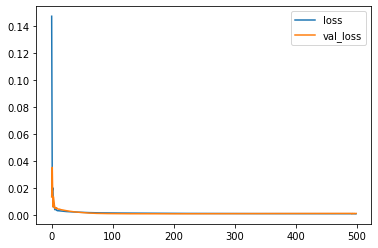

In [ ]:
# test, train loss 비교
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

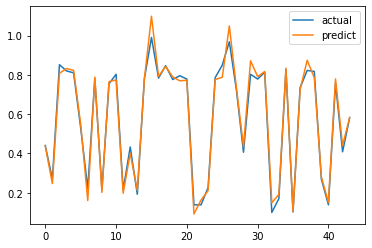

In [ ]:
# test, predict 결과 값 비교
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

# 두달치 데이터 예측

In [ ]:
# 최근 2달치 데이터에서 Adj Close를 제외한 column 변수에 저장
test_data = raw_data['2021-04-15':'2021-06-15'][raw_data.columns.difference(['Adj Close'], sort=False)]
print(test_data)
print(test_data.info())
print(test_data.shape)

               Open     High      Low    Close      Volume
Date                                                      
2021-04-15  83700.0  84500.0  83400.0  84100.0  16377412.0
2021-04-16  84700.0  84700.0  83600.0  83900.0  15429522.0
2021-04-19  83800.0  84000.0  83300.0  83300.0  15287311.0
2021-04-20  83300.0  84000.0  83100.0  83900.0  15521965.0
2021-04-21  83300.0  83500.0  82500.0  82600.0  21636079.0
2021-04-22  82900.0  83000.0  82400.0  82400.0  13934746.0
2021-04-23  81900.0  82900.0  81600.0  82800.0  17805080.0
2021-04-26  82900.0  83500.0  82600.0  83500.0  15489938.0
2021-04-27  83200.0  83300.0  82500.0  82900.0  12941533.0
2021-04-28  83200.0  83200.0  82100.0  82100.0  15596759.0
2021-04-29  82400.0  82500.0  81500.0  81700.0  20000973.0
2021-04-30  81900.0  82100.0  81500.0  81500.0  18673197.0
2021-05-03  81000.0  82400.0  81000.0  81700.0  15710336.0
2021-05-04  81900.0  82600.0  81800.0  82600.0  12532550.0
2021-05-06  81700.0  82300.0  81700.0  82300.0  17047511

### minmax scling

In [ ]:
# 기존에 fit 되어있는 스케일러를 사용해 스케일링
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[:6])
print(scaled_test_data.shape)

[[0.83120205 0.72544643 0.8459596  0.83211679 0.08711826]
 [0.85677749 0.72991071 0.8510101  0.82725061 0.07541359]
 [0.83375959 0.71428571 0.84343434 0.81265207 0.07365755]
 [0.82097187 0.71428571 0.83838384 0.82725061 0.07655509]
 [0.82097187 0.703125   0.82323232 0.79562044 0.15205294]
 [0.81074169 0.69196429 0.82070707 0.79075426 0.05695591]]
(40, 5)


#### scaling 되어있는 값을 원래의 값으로 inverse transform

In [ ]:
scaled_test_data[39][3]

0.75669099756691

In [ ]:
predict_value = minmaxscaler.inverse_transform(scaled_test_data[30].reshape(-1, 5))
print(predict_value)

[[   80300.    80600.    79600.    80500. 13321324.]]


In [ ]:
print(test_data.iloc[39])

Open         81200.0
High         81700.0
Low          80700.0
Close        81000.0
Volume    14087962.0
Name: 2021-06-11 00:00:00, dtype: float64


## feature, target 시퀀스화

In [ ]:
# feature, target 시퀀스화
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)

# ndarray로 변환
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)
print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(12, 28, 5)
(12,)


## 기존에 학습된 모델로 예측

In [ ]:
predict_test = model.predict(sequence_testdata_X)

## 결과 확인

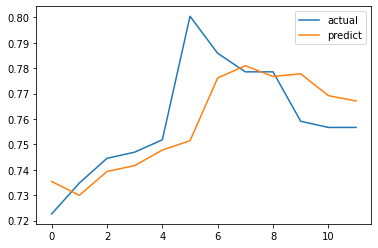

In [ ]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict_test, label='predict')
plt.legend()
plt.show()

# 가장 최근 데이터 예측

In [ ]:
# 가장 최근 28일 데이터
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [ ]:
# 예측에 사용하기 위해 reshape
last_28_data = last_28_data.reshape(-1, 28, 5)
last_28_data

array([[[0.76214834, 0.67857143, 0.78535354, 0.77372263, 0.07888112],
        [0.78516624, 0.68303571, 0.80555556, 0.79562044, 0.03964141],
        [0.78005115, 0.67633929, 0.8030303 , 0.78832117, 0.09539272],
        [0.7826087 , 0.671875  , 0.7979798 , 0.77858881, 0.05967417],
        [0.79539642, 0.703125  , 0.80555556, 0.81021898, 0.12425667],
        [0.80051151, 0.68303571, 0.78787879, 0.76155718, 0.24294257],
        [0.75703325, 0.65178571, 0.75505051, 0.7323601 , 0.32710232],
        [0.7084399 , 0.61607143, 0.71969697, 0.69586375, 0.27373159],
        [0.71099744, 0.63169643, 0.73232323, 0.73479319, 0.08802594],
        [0.75703325, 0.64508929, 0.73989899, 0.72262774, 0.10395422],
        [0.72634271, 0.625     , 0.73737374, 0.72262774, 0.10091105],
        [0.72122762, 0.61830357, 0.73737374, 0.72019465, 0.08914848],
        [0.73913043, 0.65848214, 0.75505051, 0.73479319, 0.1437258 ],
        [0.73913043, 0.63392857, 0.74747475, 0.72506083, 0.05033632],
        [0.73657289,

In [ ]:
# 기존에 학습된 모델로 예측
today_close = model.predict(last_28_data)
print(today_close)

[[0.76861674]]


In [ ]:
minmaxscaler_close = MinMaxScaler()
minmaxscaler_close.fit(data[['Close']])  # 예측값을 inverse_transform하기 위해 Close 하나만 받는 스케일러 fit

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# 예측 값 inverse transform
today_close = minmaxscaler_close.inverse_transform(today_close)
today_close

array([[81490.15]], dtype=float32)